This notebook will perform the following tasks:

1. **Load the data from yfinance**
2. **Plot the data.**
3. **Decompose the data into trend, seasonality, and residuals.**
4. **Check for stationarity using the augmented Dickey-Fuller test.**
5. **Plot the ACF and PACF.**

The output of the notebook will be a series of plots that will help you to understand the structure of the time series data. The ACF and PACF plots will be particularly useful for identifying the appropriate model for forecasting the time series.

In [ ]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 10, 5
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

# **Loading the stock data from yfinance**

In [ ]:
import yfinance as yf
data =  yf.download(tickers="AAPL", start="2022-6-1",end="2022-12-31",progress=False) #Use your own ticker and tinker
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-06-01,149.899994,151.740005,147.679993,148.710007,147.827301,74286600
2022-06-02,147.830002,151.270004,146.860001,151.210007,150.312469,72348100
2022-06-03,146.899994,147.970001,144.460007,145.380005,144.517059,88570300
2022-06-06,147.029999,148.570007,144.899994,146.139999,145.272537,71598400
2022-06-07,144.350006,149.000000,144.100006,148.710007,147.827301,67808200


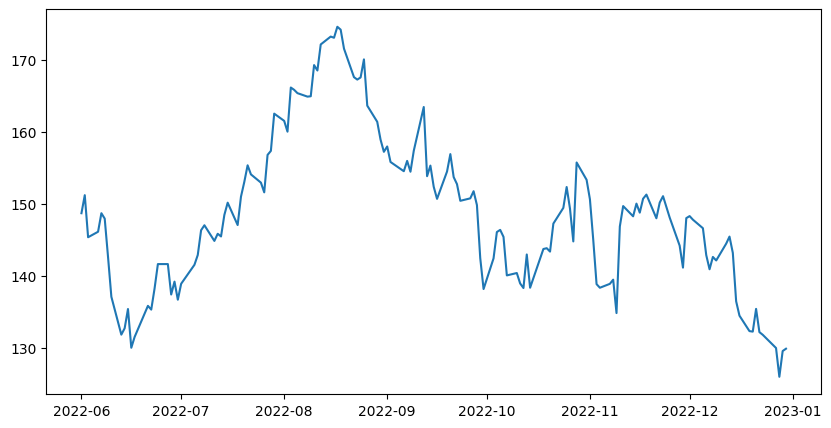

In [ ]:
df = data['Close']
plt.plot(df)
plt.show()

# **Applying the additive seasonal decomposition on the stocks closing price**

In [ ]:
# Decompose the data
decomposition = seasonal_decompose(df, period=6)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

Text(0.5, 1.0, 'Trend_Decomposition')

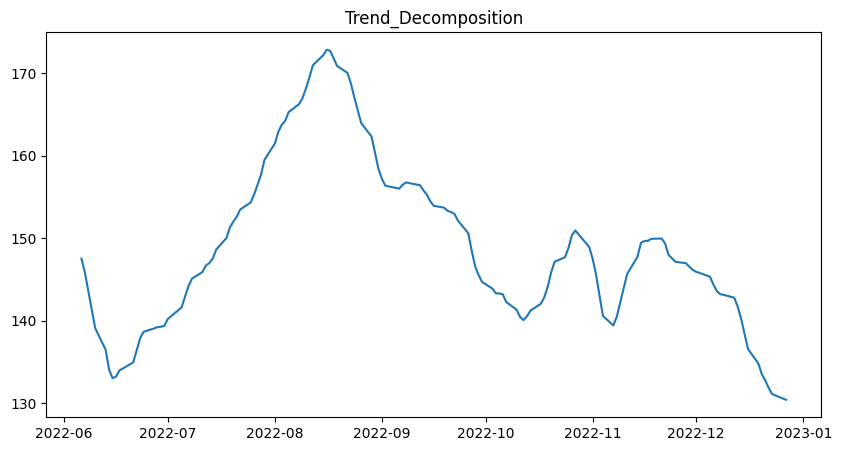

In [ ]:
plt.plot(trend)
plt.title('Trend_Decomposition') #trend of the stock's closing price

Text(0.5, 1.0, 'Seasonality_Decomposition')

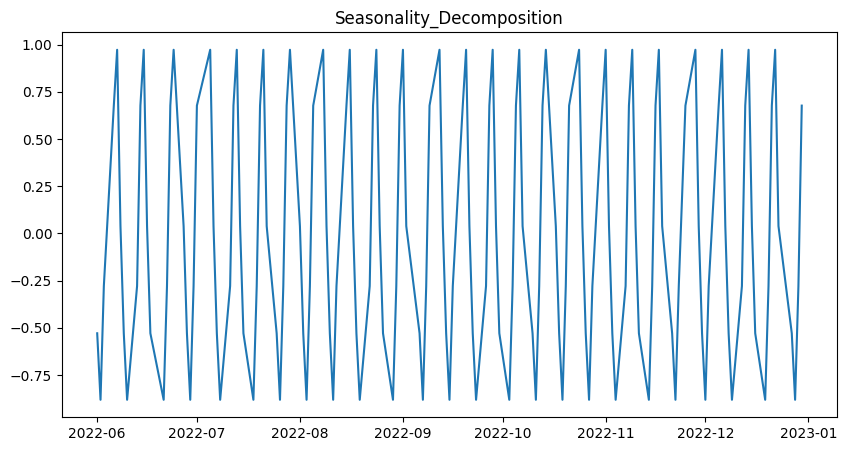

In [ ]:
plt.plot(seasonal)
plt.title('Seasonality_Decomposition') #seasonal decomposition of the closing price

Text(0.5, 1.0, 'Residual_Decomposition')

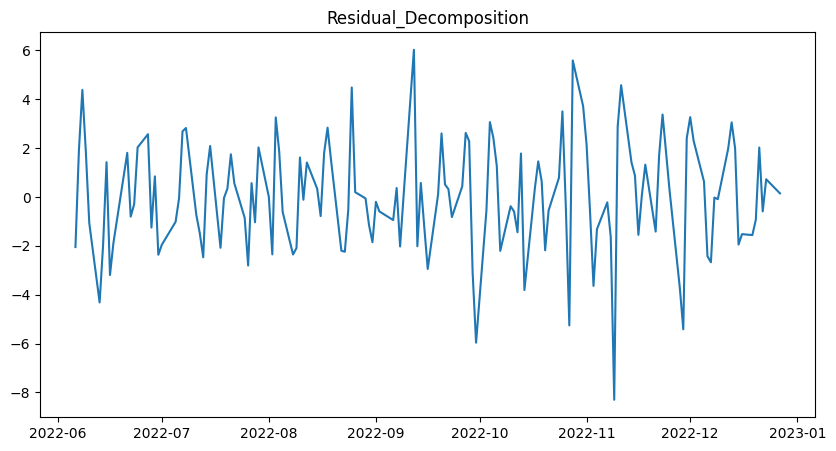

In [ ]:
plt.plot(residual)
plt.title('Residual_Decomposition') #Residual error of the stock's closing price

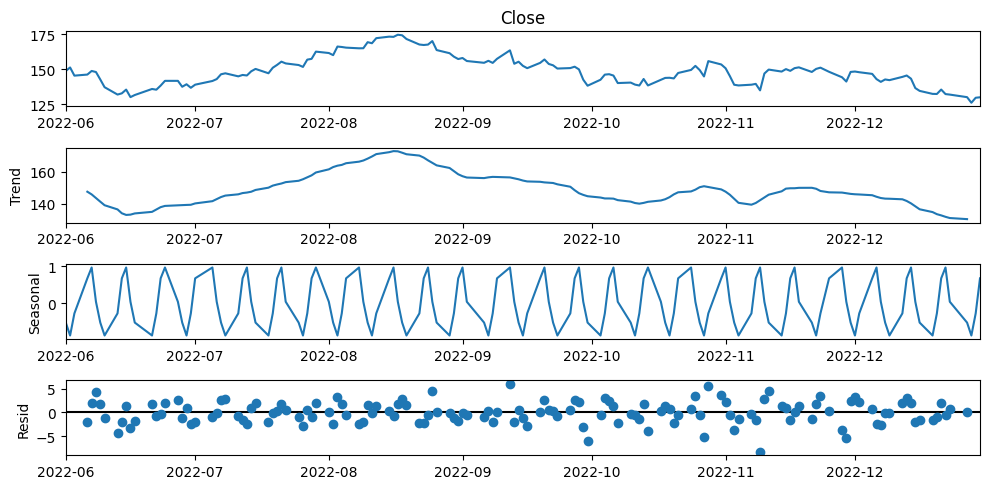

In [ ]:
decomposition = sm.tsa.seasonal_decompose(data.Close, period=6 ,model='additive') # additive seasonal index
fig = decomposition.plot()
plt.show()

# **Using Dickey-Fuller Test for stationarity testing**

In [ ]:
# Check for stationarity
adf = adfuller(df)

# Print the results of the test
print('ADF Statistic: {}'.format(adf[0]))
print('p-value: {}'.format(adf[1]))

# If the p-value is less than 0.05, the data is stationary
if adf[1] < 0.05:
    print('The data is stationary')
else:
    print('The data is not stationary')

ADF Statistic: -1.4772047106278032
p-value: 0.5447562017330609
The data is not stationary


# **Plotting ACF and PACF for finding appropriate Lag window and appropriate time frames**

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

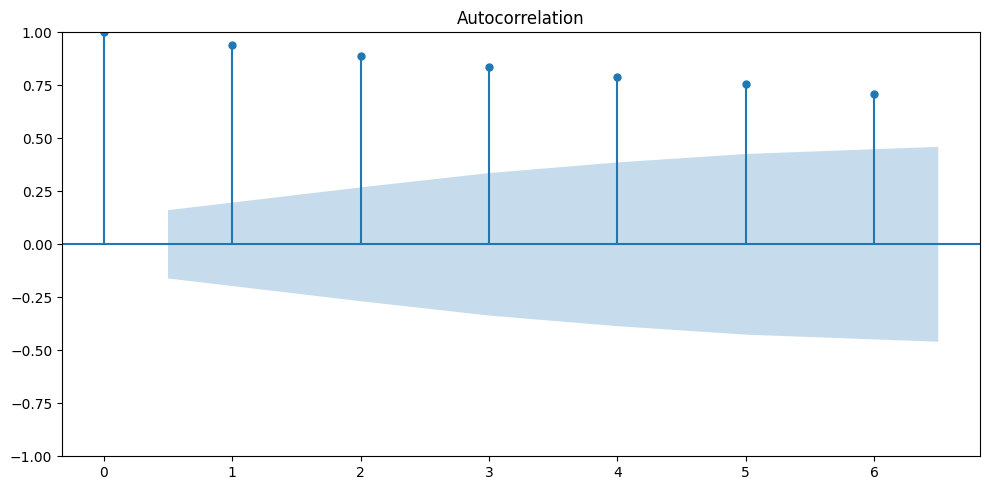

In [ ]:
plot_acf(df,lags=6)
plt.tight_layout()
plt.show() # as we can see that as we move farther from present closing price correlation decresases

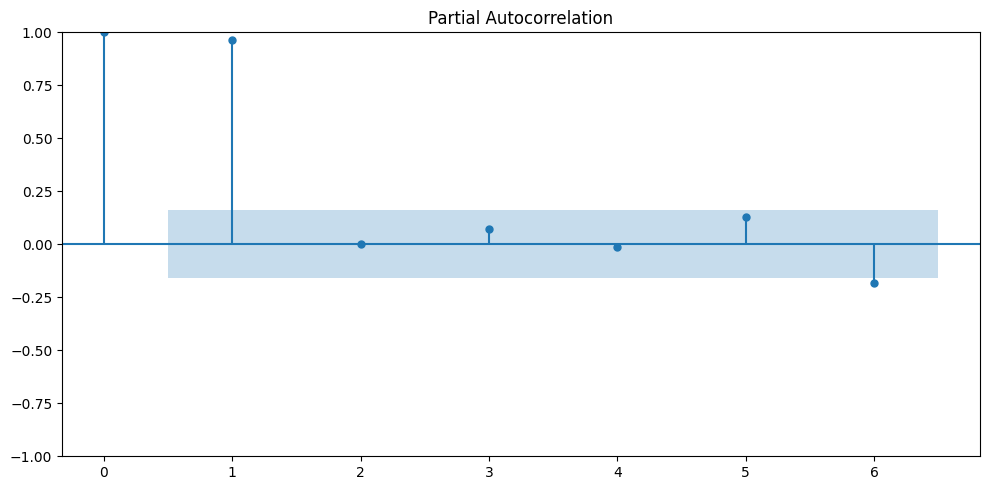

In [ ]:
plot_pacf(df,lags=6, method='ols')
plt.tight_layout()
plt.show()   #both PACF AND ACF HELP US TO FIND THE VALUE OF ORDER FOR A PARTICULAR TS MODEL WHICH HELPS IN INCREASING THE ACCURACY OF THE MODEL

**In Next NoteBook we will be using various time series model for predictions**